# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Models
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score\
, balanced_accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Your code here
data = pd.read_csv('data_all.csv')

In [3]:
print(data.shape)
data.head()

(116322, 785)


,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


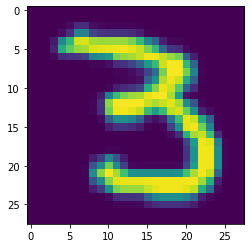

In [4]:
# Display an image
image = np.array(data.iloc[2,1:])
plt.imshow(image.reshape(28, 28));

In [5]:
# Print unique values for e
print(len(data.e.unique()))
print(sorted(data.e.unique()))

62
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0]


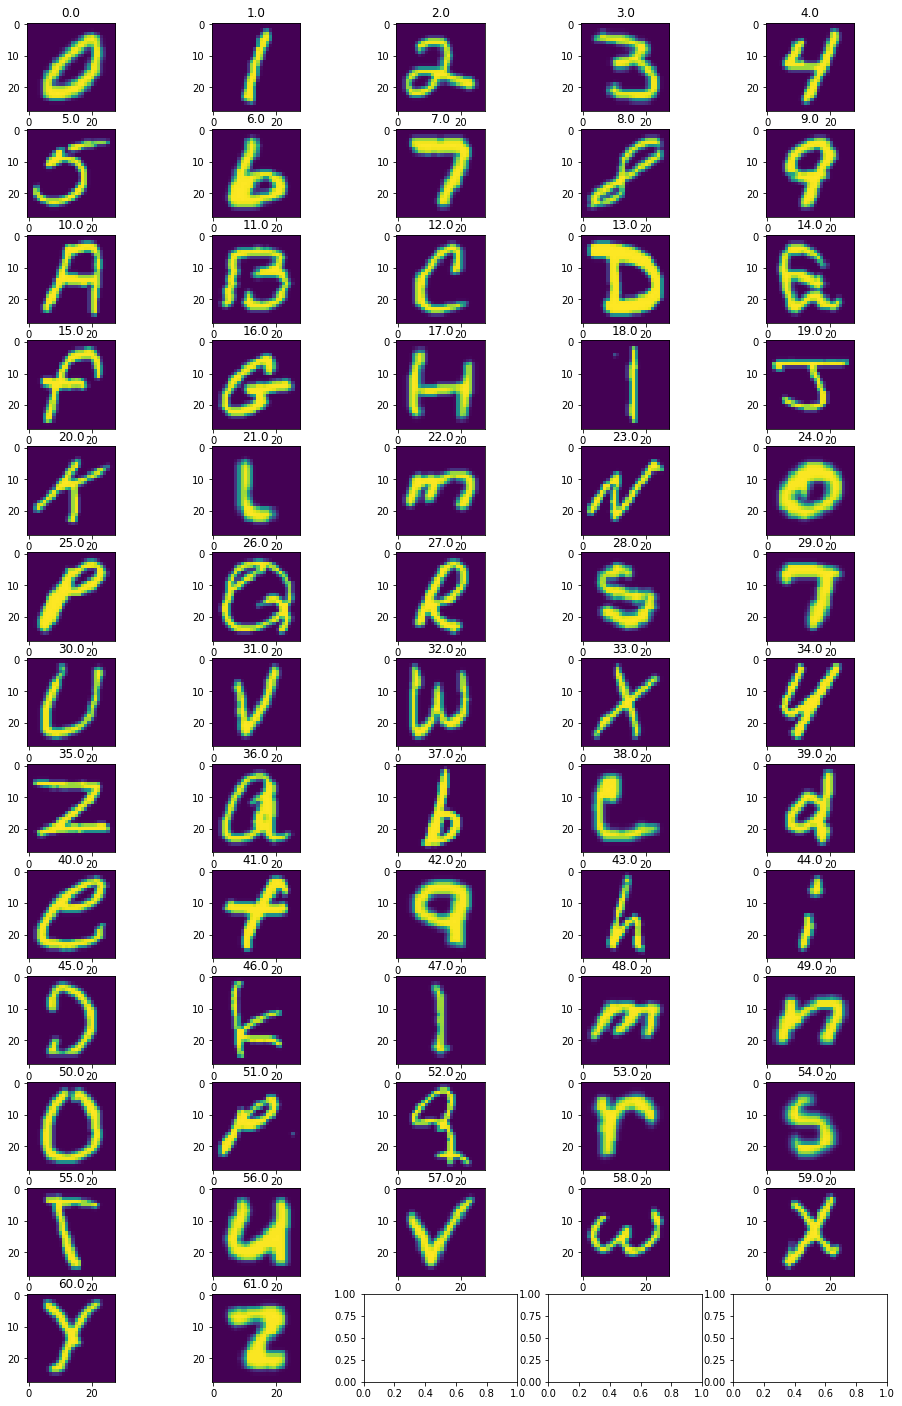

In [6]:
# Figure out what e value corresponds to
fig, axs = plt.subplots(13, 5, figsize=(16,25))
row = 0 
column = -1

for value in sorted(data.e.unique()):
    if column < 4:
        column += 1
        
    else:
        column = 0
        row += 1
    
    image = np.array(data.loc[data.e == value, data.columns != 'e'].reset_index(drop=True).iloc[0, :])
    axs[row, column].imshow(image.reshape(28, 28))
    axs[row, column]
    axs[row, column].set_title(value)

In [7]:
def e_legend(value):
    if value <= 9:
        return 'number' # For number
        
    elif 10 <= value <= 35:
        return 'lowercase' # For lowercase
        
    else:
        return 'uppercase' # For uppercase

In [8]:
# Add new column with legend
data['e_legend']  = data.e.apply(e_legend)

In [9]:
data.head()

,e,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,e_legend
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,uppercase
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,number
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,number
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,lowercase
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,lowercase


In [10]:
data_clean = pd.get_dummies(data=data).copy()

In [11]:
data_clean.head()

,e,1,2,3,4,5,6,7,8,9,...,778,779,780,781,782,783,784,e_legend_lowercase,e_legend_number,e_legend_uppercase
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [12]:
# Your code here
X = data_clean.drop(['e', 'e_legend_lowercase', 'e_legend_number', 'e_legend_uppercase'], axis=1).copy()
y_number = data_clean.e_legend_number
y_lower = data_clean.e_legend_lowercase
y_upper = data_clean.e_legend_uppercase

In [13]:
models = [LogisticRegression(solver='sag'), MultinomialNB(), SGDClassifier(), RandomForestClassifier(random_state=1), KNeighborsClassifier()]
model_labels = ['Logistic', 'Multinomial', 'SGDC', 'RF', 'KNeighbors']

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_upper, test_size = 0.2, random_state =1)
for i, model in enumerate(models):
    try: 
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        print(f'\n{model_labels[i]}')
        print(f"Accuracy train: {accuracy_score(y_train, y_pred_train)}")
        print(f"Accuracy test: {accuracy_score(y_test, y_pred_test)}")
    
    except AttributeError:
        print(f'Error with {model}')

C:\Users\Francisco Galan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Logistic
Accuracy train: 0.8160697207088129
Accuracy test: 0.8079948420373952

Multinomial
Accuracy train: 0.7051699496007823
Accuracy test: 0.7028583709434774

SGDC
Accuracy train: 0.7024189475267847
Accuracy test: 0.6985170857511283

RF
Accuracy train: 0.9999892538981484
Accuracy test: 0.8826993337631636


* Try to do the same thing with lowercases.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_lower, test_size = 0.2, random_state =1)
for i, model in enumerate(models):
    try: 
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        print(f'\n{model_labels[i]}')
        print(f"Accuracy train: {accuracy_score(y_train, y_pred_train)}")
        print(f"Accuracy test: {accuracy_score(y_test, y_pred_test)}")
    
    except AttributeError:
        print(f'Error with {model}')

* Try to do the same thing with numbers.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_number, test_size = 0.2, random_state =1)
for i, model in enumerate(models):
    try: 
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        print(f'\n{model_labels[i]}')
        print(f"Accuracy train: {accuracy_score(y_train, y_pred_train)}")
        print(f"Accuracy test: {accuracy_score(y_test, y_pred_test)}")
    
    except AttributeError:
        print(f'Error with {model}')